In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
#Uploading DBs from local drive
from google.colab import files
uploaded = files.upload()

Saving Average_Price_New_Houses_Sold_USA.csv to Average_Price_New_Houses_Sold_USA.csv
Saving GDP.csv to GDP.csv
Saving New_Houses_Sold.csv to New_Houses_Sold.csv
Saving Newly_Completed_Home.csv to Newly_Completed_Home.csv
Saving Personal_Income.csv to Personal_Income.csv
Saving Population.csv to Population.csv
Saving RAW_Material_Avg.csv to RAW_Material_Avg.csv
Saving Supply_New_Houses.csv to Supply_New_Houses.csv
Saving Unemployement_Rate.csv to Unemployement_Rate.csv
Saving US_Home_Index.csv to US_Home_Index.csv


In [3]:
df1 = pd.read_csv("Average_Price_New_Houses_Sold_USA.csv", parse_dates = True)
df1.DATE = pd.to_datetime(df1.DATE)
df2 = pd.read_csv("GDP.csv", parse_dates = True)
df2.DATE = pd.to_datetime(df2.DATE)
df3 = pd.read_csv("Newly_Completed_Home.csv", parse_dates = True)
df3.DATE = pd.to_datetime(df3.DATE)
df4 = pd.read_csv("Supply_New_Houses.csv", parse_dates = True)
df4.DATE = pd.to_datetime(df4.DATE)
df5 = pd.read_csv("Unemployement_Rate.csv", parse_dates = True)
df5.DATE = pd.to_datetime(df5.DATE)
df6 = pd.read_csv("Personal_Income.csv", parse_dates = True)
df6.DATE = pd.to_datetime(df6.DATE)
df7 = pd.read_csv("Population.csv", parse_dates = True)
df7.DATE = pd.to_datetime(df7.DATE)
df8 = pd.read_csv("RAW_Material_Avg.csv", parse_dates = True)
df8.DATE = pd.to_datetime(df8.DATE)
df9 = pd.read_csv("New_Houses_Sold.csv", parse_dates = True)
df9.DATE = pd.to_datetime(df9.DATE)

y = pd.read_csv("US_Home_Index.csv", parse_dates = True)
y.DATE = pd.to_datetime(y.DATE)

In [4]:
#Creating function to analyze the tables
def Analyze(df, feature):
  print("\nChecking Data from the table")
  print(df.head())
  print("\nAnalyzing Data")
  print(df.describe())
  print("\nChecking Null Values")
  print(df.isnull().sum())
  plt.figure(figsize=(20, 6))
  mean_group = df[['DATE',feature]].groupby(['DATE'])[feature].mean()
  plt.plot(mean_group, color=[230/255, 159/255, 0])
  plt.tick_params(axis='both', which = 'major', labelsize = 10)
  plt.xlabel('Year',fontsize = 15)
  plt.ylabel(feature,fontsize = 15)
  plt.title(feature,fontsize = 23)

## Analyzing Databases

Average Sales Price for New Houses Sold in the United States


Checking Data from the table
        DATE  ASPNHSUS
0 1975-01-01   39500.0
1 1975-02-01   40600.0
2 1975-03-01   42100.0
3 1975-04-01   42000.0
4 1975-05-01   43200.0

Analyzing Data
            ASPNHSUS
count     570.000000
mean   210226.315789
std    113094.614614
min     39500.000000
25%    117125.000000
50%    182850.000000
75%    295900.000000
max    569300.000000

Checking Null Values
DATE        0
ASPNHSUS    0
dtype: int64


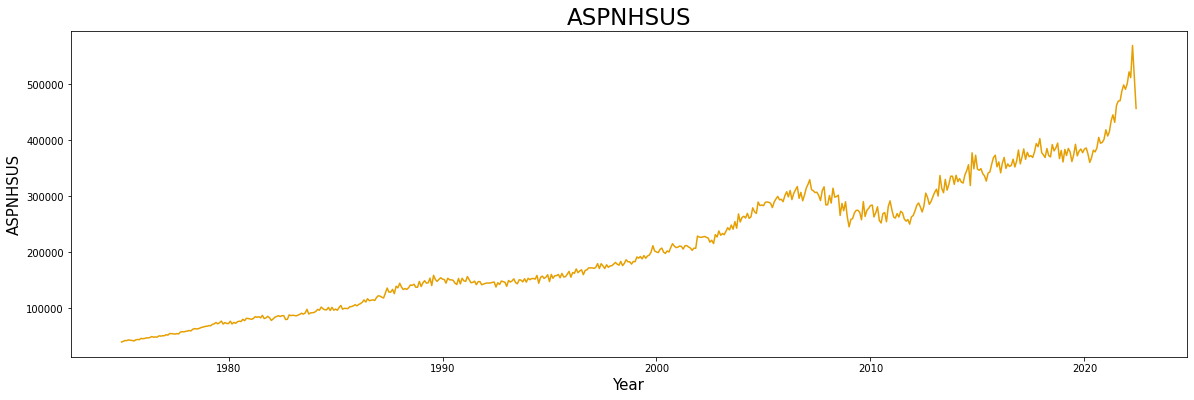

In [5]:
Analyze(df1, "ASPNHSUS")

GDP


Checking Data from the table
        DATE  USALORSGPNOSTSAM
0 1960-01-01        101.002755
1 1960-02-01        101.012970
2 1960-03-01        100.937957
3 1960-04-01        100.780161
4 1960-05-01        100.558329

Analyzing Data
       USALORSGPNOSTSAM
count        749.000000
mean          99.980492
std            1.262525
min           91.580035
25%           99.429017
50%           99.998154
75%          100.769883
max          102.914459

Checking Null Values
DATE                0
USALORSGPNOSTSAM    0
dtype: int64


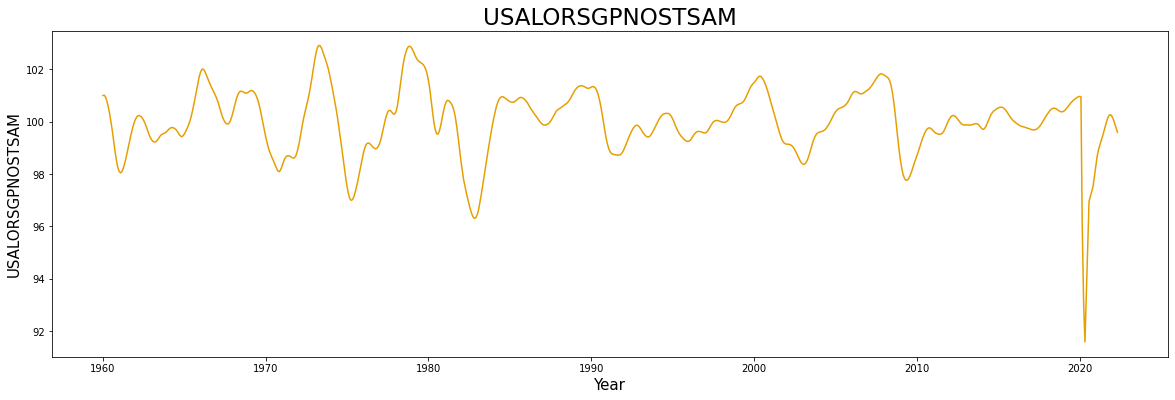

In [6]:
Analyze(df2,"USALORSGPNOSTSAM")

Newly Completed Home


Checking Data from the table
        DATE  MNMFS
0 1975-01-01    4.7
1 1975-02-01    5.0
2 1975-03-01    5.5
3 1975-04-01    6.0
4 1975-05-01    6.2

Analyzing Data
            MNMFS
count  570.000000
mean     5.126316
std      1.953261
min      2.500000
25%      3.800000
50%      4.700000
75%      5.800000
max     14.000000

Checking Null Values
DATE     0
MNMFS    0
dtype: int64


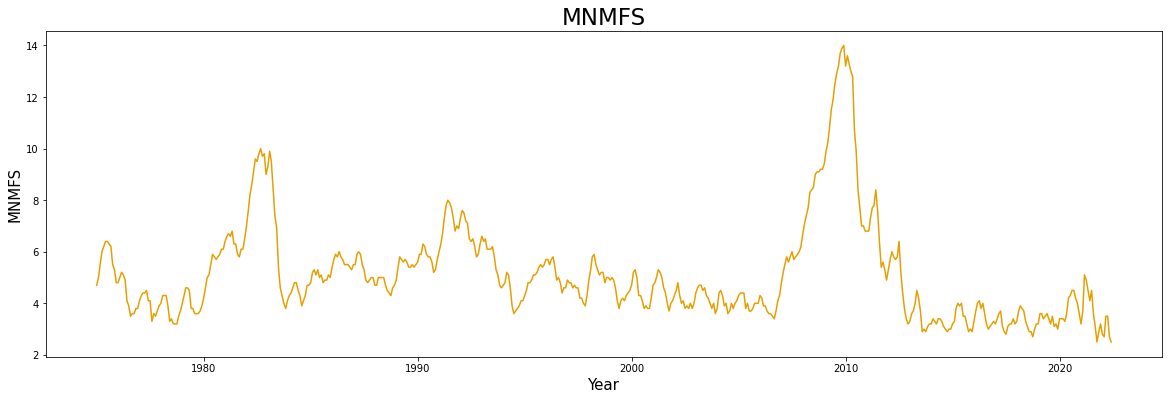

In [7]:
Analyze(df3,"MNMFS")

New House Supply


Checking Data from the table
        DATE  MSACSR
0 1963-01-01     4.7
1 1963-02-01     6.6
2 1963-03-01     6.4
3 1963-04-01     5.3
4 1963-05-01     5.1

Analyzing Data
           MSACSR
count  714.000000
mean     6.046218
std      1.634642
min      3.300000
25%      4.900000
50%      5.800000
75%      6.800000
max     12.200000

Checking Null Values
DATE      0
MSACSR    0
dtype: int64


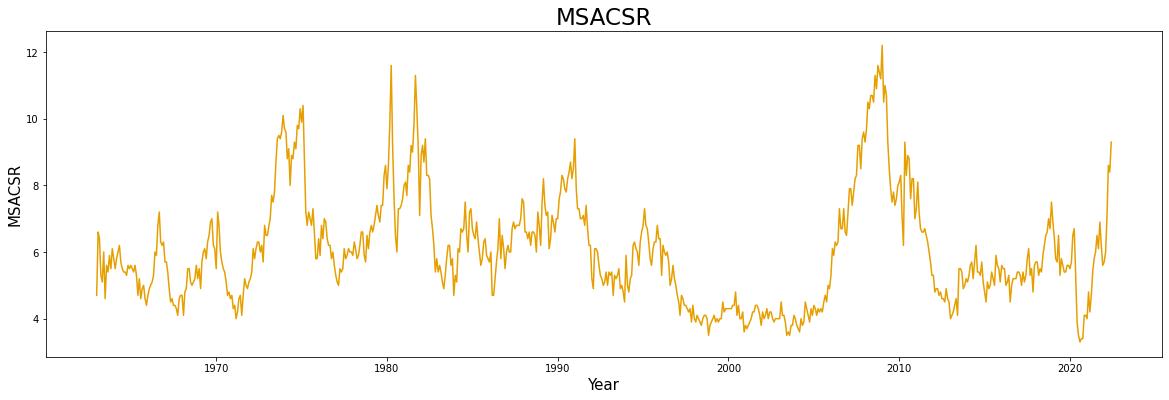

In [8]:
Analyze(df4, "MSACSR")

Unemployment Rate


Checking Data from the table
        DATE  UNRATE
0 1948-01-01     3.4
1 1948-02-01     3.8
2 1948-03-01     4.0
3 1948-04-01     3.9
4 1948-05-01     3.5

Analyzing Data
           UNRATE
count  895.000000
mean     5.744581
std      1.700629
min      2.500000
25%      4.500000
50%      5.500000
75%      6.800000
max     14.700000

Checking Null Values
DATE      0
UNRATE    0
dtype: int64


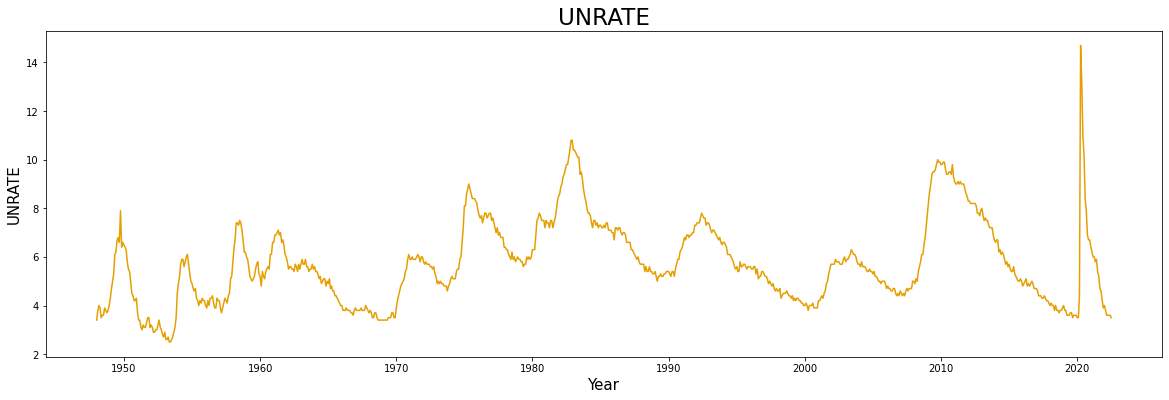

In [9]:
Analyze(df5, 'UNRATE')

Personal Income


Checking Data from the table
        DATE     PI
0 1959-01-01  391.8
1 1959-02-01  393.7
2 1959-03-01  396.5
3 1959-04-01  399.9
4 1959-05-01  402.4

Analyzing Data
                 PI
count    762.000000
mean    6723.130840
std     5970.358802
min      391.800000
25%     1298.350000
50%     4967.650000
75%    11424.750000
max    24142.400000

Checking Null Values
DATE    0
PI      0
dtype: int64


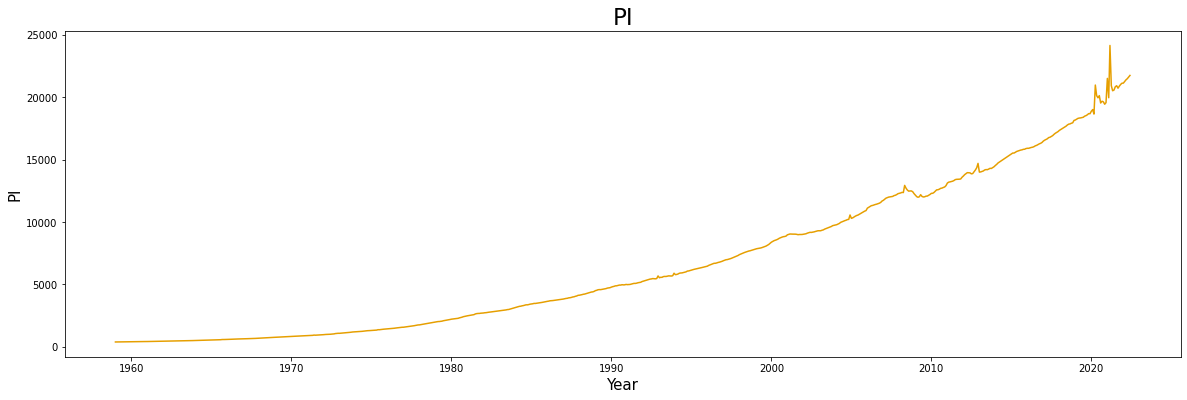

In [10]:
Analyze(df6, "PI")

Population


Checking Data from the table
        DATE    POPTHM
0 1959-01-01  175818.0
1 1959-02-01  176044.0
2 1959-03-01  176274.0
3 1959-04-01  176503.0
4 1959-05-01  176723.0

Analyzing Data
              POPTHM
count     762.000000
mean   256096.565617
std     47322.339508
min    175818.000000
25%    214742.250000
50%    251052.500000
75%    299111.000000
max    333028.000000

Checking Null Values
DATE      0
POPTHM    0
dtype: int64


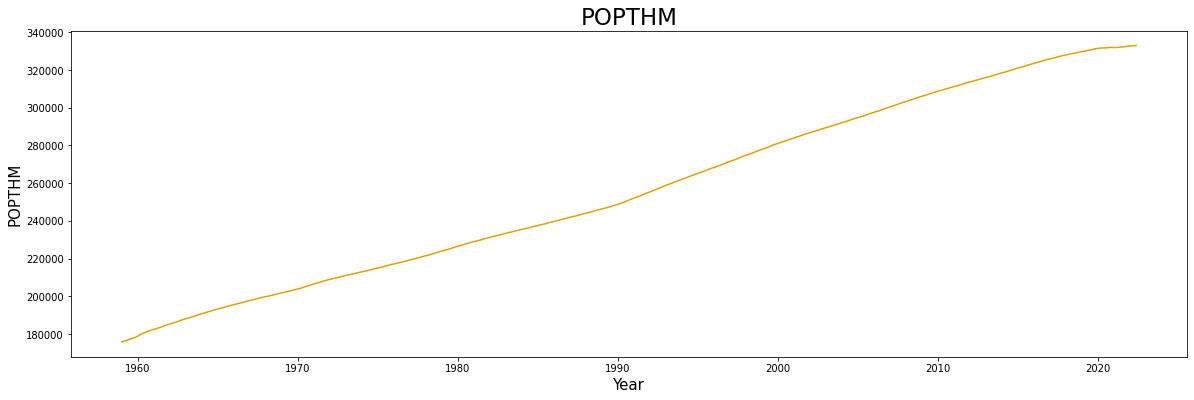

In [11]:
Analyze(df7, "POPTHM")

RAW Material Avg


Checking Data from the table
        DATE  PRAWMINDEXM
0 1990-01-01    72.855085
1 1990-02-01    73.449658
2 1990-03-01    74.172077
3 1990-04-01    76.022077
4 1990-05-01    75.418959

Analyzing Data
       PRAWMINDEXM
count   389.000000
mean     96.102451
std      21.933672
min      60.097596
25%      75.989059
50%      95.497934
75%     107.952062
max     187.205271

Checking Null Values
DATE           0
PRAWMINDEXM    0
dtype: int64


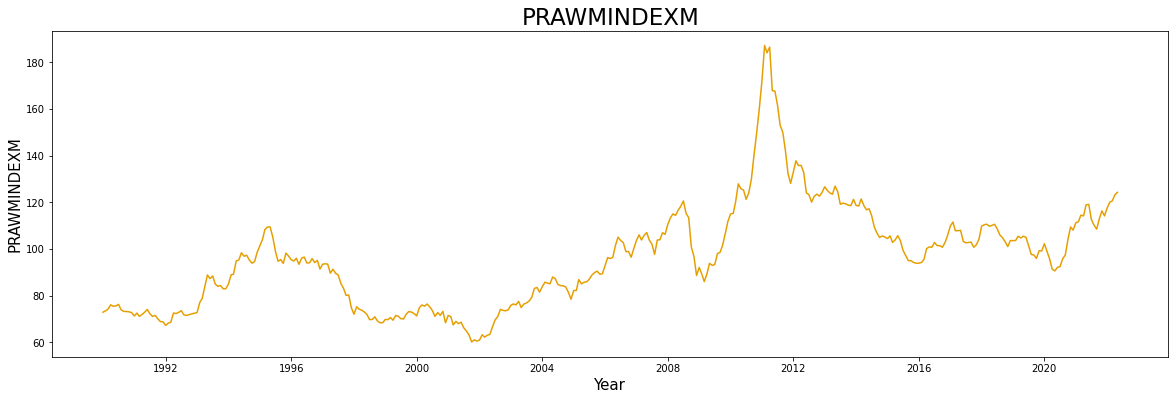

In [12]:
Analyze(df8, "PRAWMINDEXM")

New Houses Sold


Checking Data from the table
        DATE  NHSUSSPT
0 2002-01-01        66
1 2002-02-01        84
2 2002-03-01        90
3 2002-04-01        86
4 2002-05-01        88

Analyzing Data
         NHSUSSPT
count  246.000000
mean    57.048780
std     25.647804
min     20.000000
25%     36.000000
50%     50.000000
75%     76.000000
max    127.000000

Checking Null Values
DATE        0
NHSUSSPT    0
dtype: int64


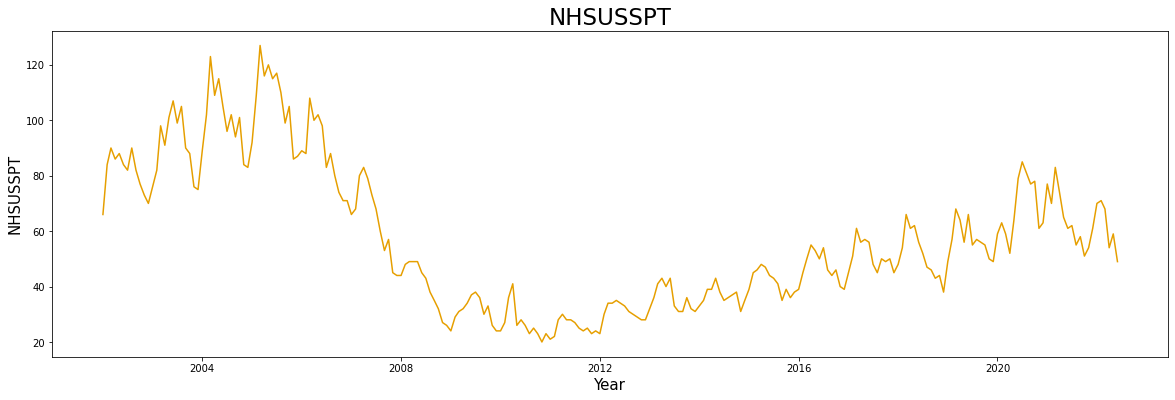

In [13]:
Analyze(df9, "NHSUSSPT")

Merging Databases

In [14]:
df = pd.merge(df1,df2, on = "DATE", how = "inner")
df = pd.merge(df,df3, on = "DATE", how = "inner")
df = pd.merge(df,df4, on = "DATE", how = "inner")
df = pd.merge(df,df5, on = "DATE", how = "inner")
df = pd.merge(df,df6, on = "DATE", how = "inner")
df = pd.merge(df,df7, on = "DATE", how = "inner")
df = pd.merge(df,df8, on = "DATE", how = "inner")
df = pd.merge(df,df9, on = "DATE", how = "inner")
df = pd.merge(df, y, on = "DATE", how = "inner")

In [15]:
df.head()

,DATE,ASPNHSUS,USALORSGPNOSTSAM,MNMFS,MSACSR,UNRATE,PI,POPTHM,PRAWMINDEXM,NHSUSSPT,CSUSHPISA
0,2002-01-01,226900.0,99.143575,4.3,4.2,5.7,9025.1,286739.0,60.919209,66,117.143
1,2002-02-01,226500.0,99.140021,4.5,4.0,5.7,9040.4,286935.0,63.197901,84,117.844
2,2002-03-01,227100.0,99.133974,4.8,4.1,5.7,9059.0,287131.0,62.177913,90,118.687
3,2002-04-01,228100.0,99.115821,4.3,4.3,5.9,9108.7,287343.0,62.959154,86,119.611
4,2002-05-01,226500.0,99.078901,4.0,4.0,5.8,9140.4,287571.0,63.342585,88,120.724


In [16]:
df.describe()

,ASPNHSUS,USALORSGPNOSTSAM,MNMFS,MSACSR,UNRATE,PI,POPTHM,PRAWMINDEXM,NHSUSSPT,CSUSHPISA
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,322277.142857,99.809916,4.933878,5.945306,6.069388,14242.246531,312941.595918,105.657897,57.081633,174.376616
std,64355.627978,1.288263,2.563912,1.895537,1.971166,3471.531025,14329.022727,20.889206,25.695120,37.189074
min,215300.000000,91.580035,2.500000,3.300000,3.500000,9025.100000,286739.000000,60.919209,20.000000,117.143000
25%,274000.000000,99.528823,3.400000,4.500000,4.700000,11824.100000,300608.000000,93.850880,36.000000,146.401000
50%,307100.000000,99.907066,4.000000,5.400000,5.600000,13859.900000,313993.000000,103.822927,50.000000,169.138000
75%,369200.000000,100.484736,5.400000,6.700000,7.300000,16666.600000,326371.000000,116.579649,76.000000,188.818000
max,569300.000000,101.829671,14.000000,12.200000,14.700000,24142.400000,332928.000000,187.205271,127.000000,304.831000


In [17]:
df.isnull().sum()

DATE                0
ASPNHSUS            0
USALORSGPNOSTSAM    0
MNMFS               0
MSACSR              0
UNRATE              0
PI                  0
POPTHM              0
PRAWMINDEXM         0
NHSUSSPT            0
CSUSHPISA           0
dtype: int64

## Bivariate Analysis

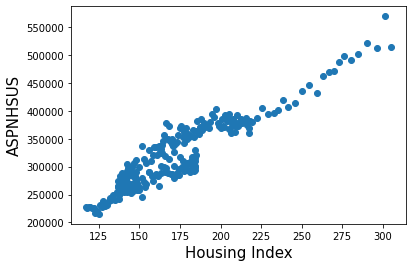

In [18]:
list = ["ASPNHSUS", "USALORSGPNOSTSAM", "MNMFS", "MSACSR", "UNRATE", "PI", "POPTHM", "PRAWMINDEXM", "NHSUSSPT"]

plt.scatter(df['CSUSHPISA'], df["ASPNHSUS"])
plt.tick_params(axis='both', which = 'major', labelsize = 10)
plt.xlabel('Housing Index',fontsize = 15)
plt.ylabel("ASPNHSUS",fontsize = 15)
plt.show()

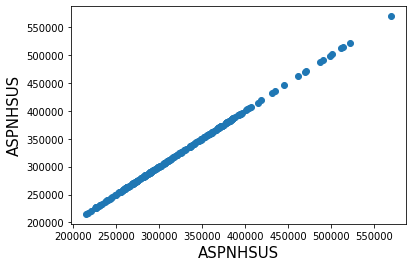

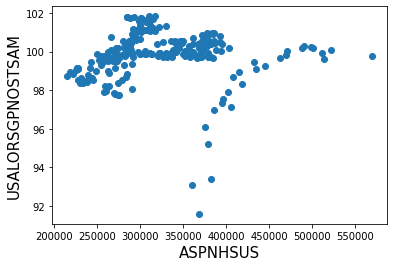

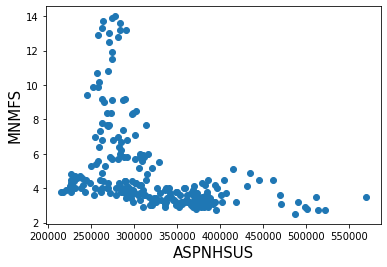

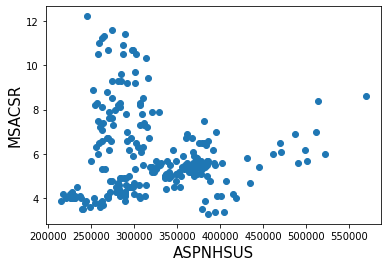

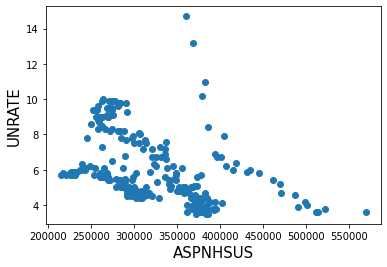

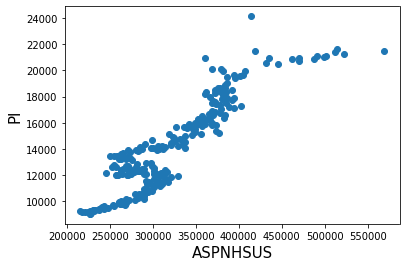

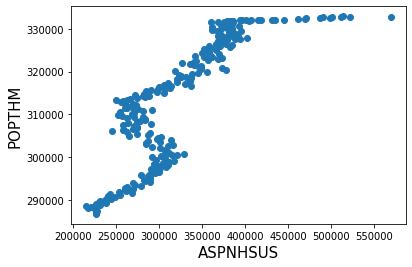

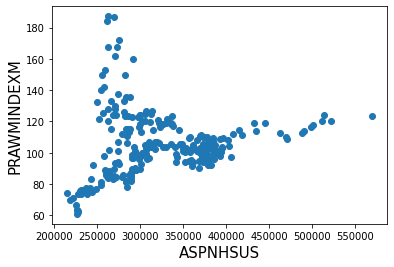

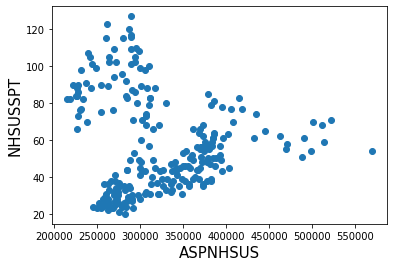

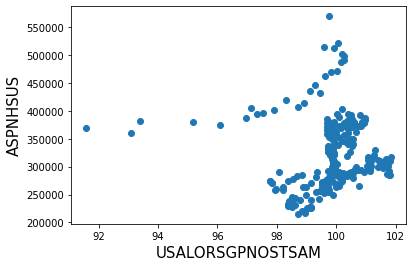

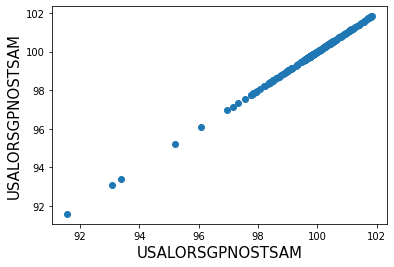

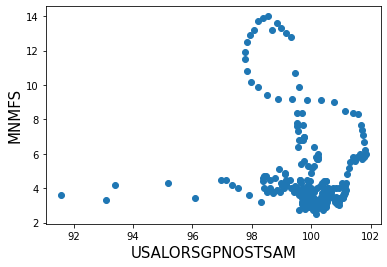

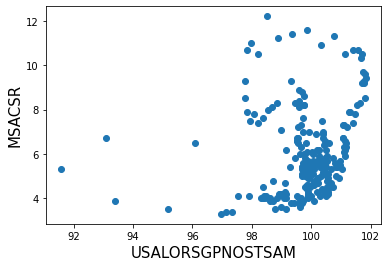

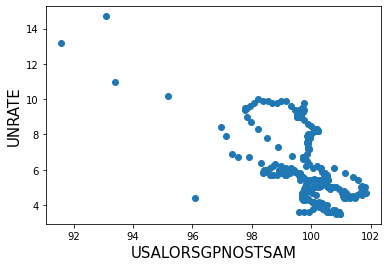

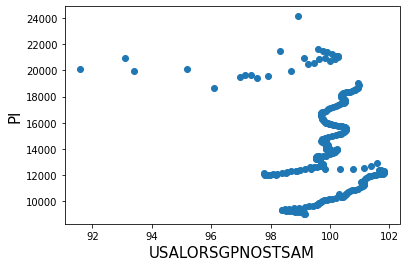

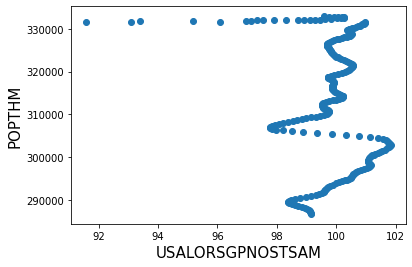

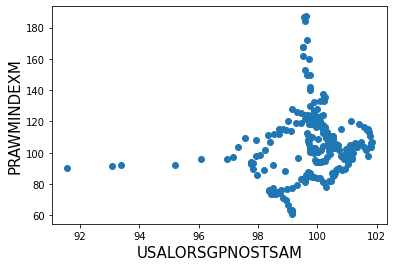

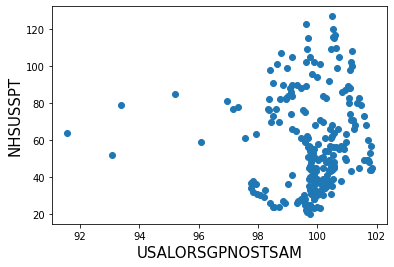

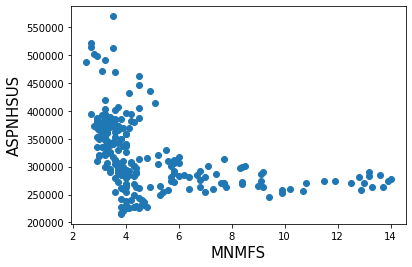

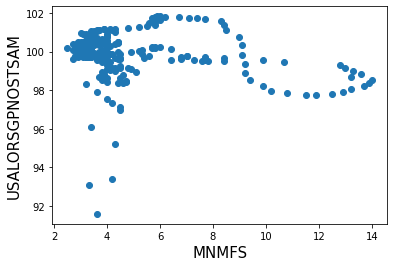

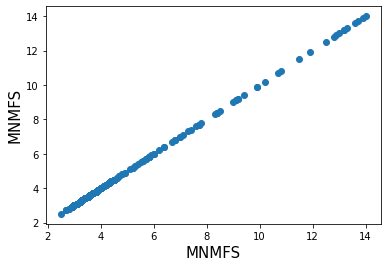

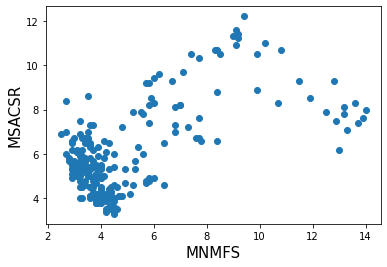

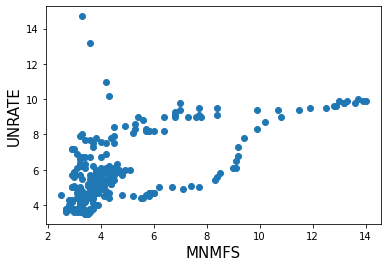

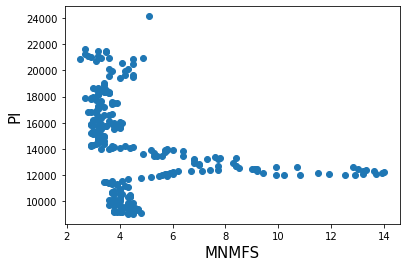

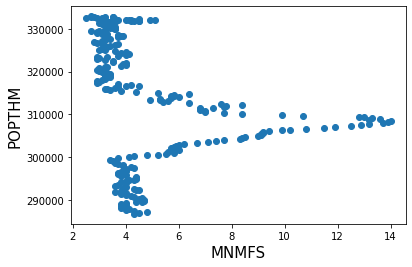

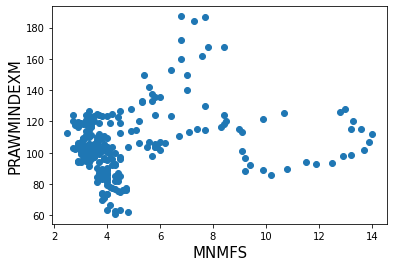

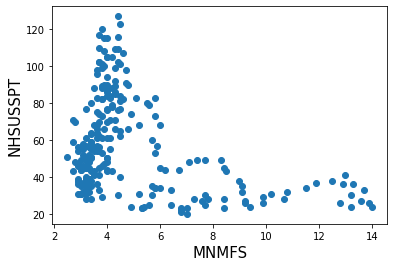

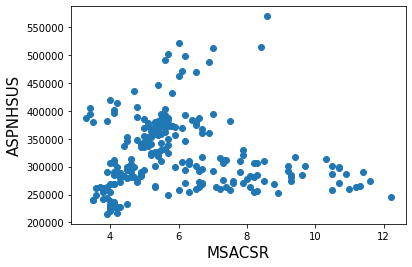

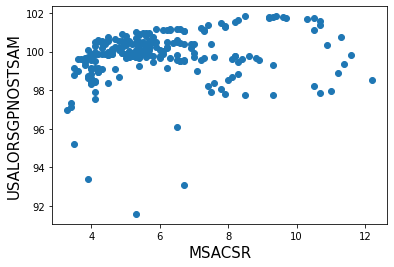

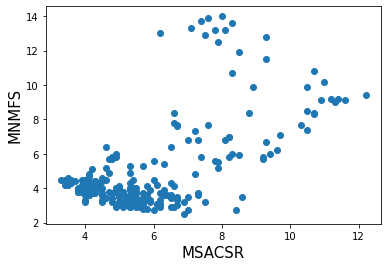

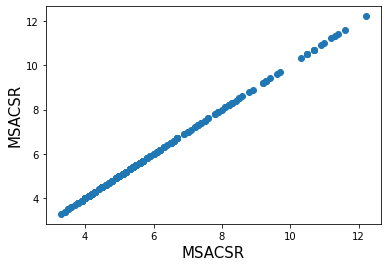

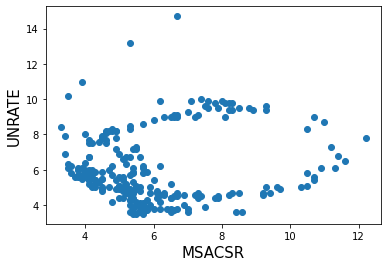

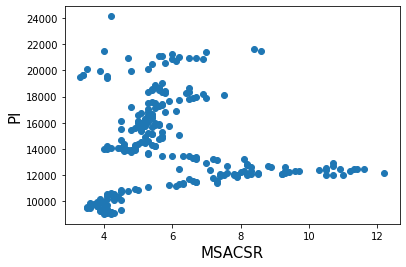

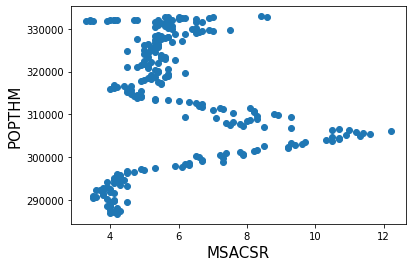

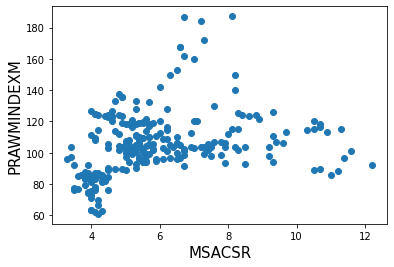

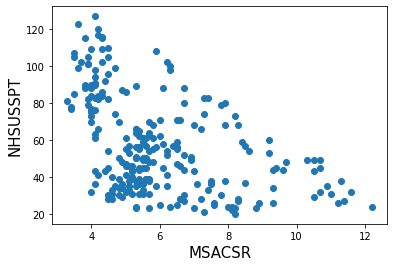

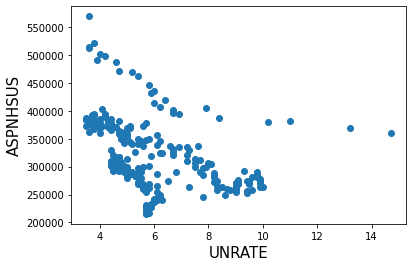

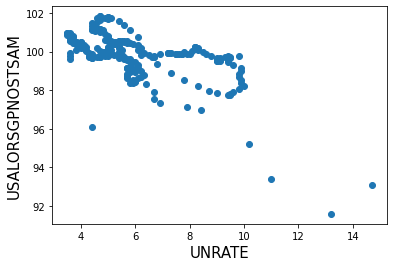

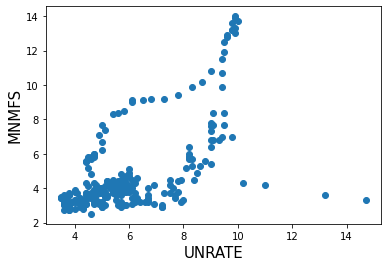

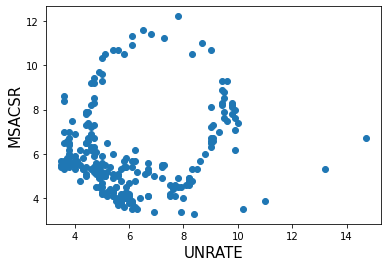

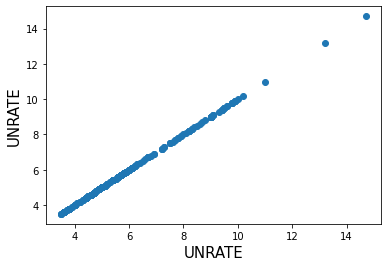

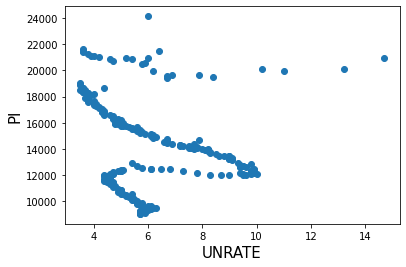

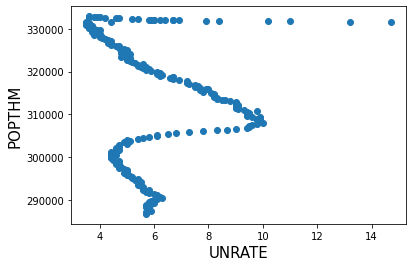

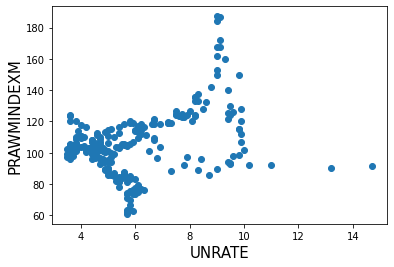

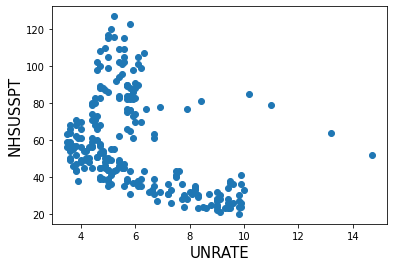

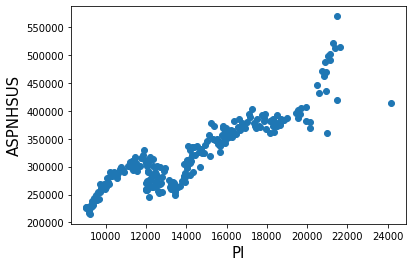

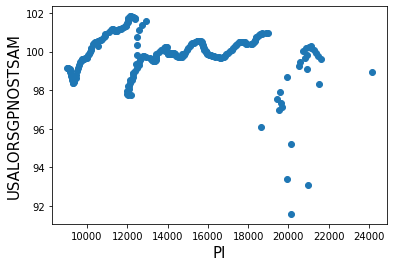

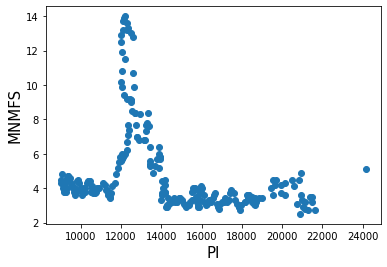

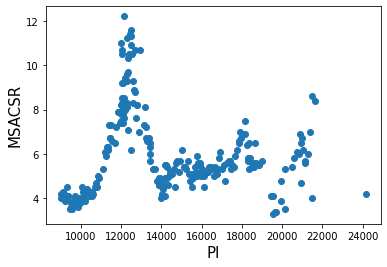

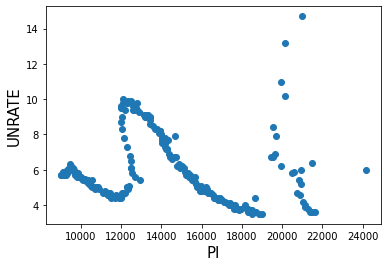

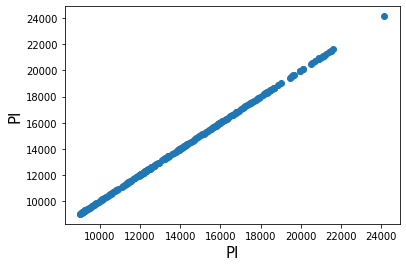

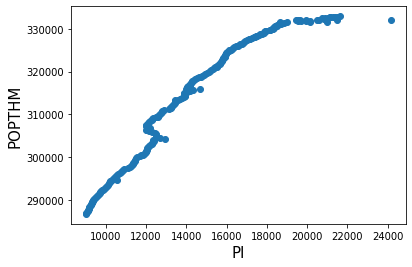

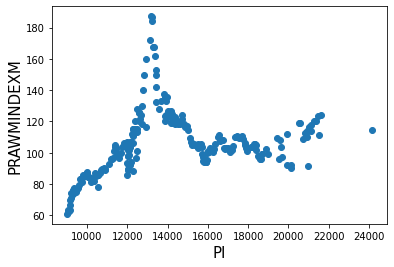

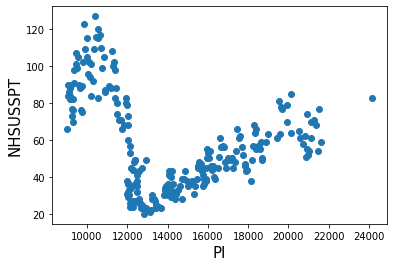

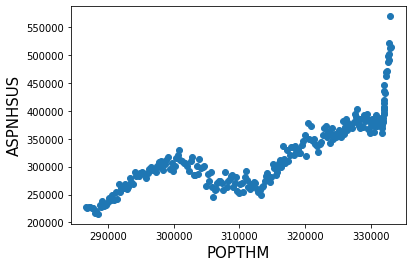

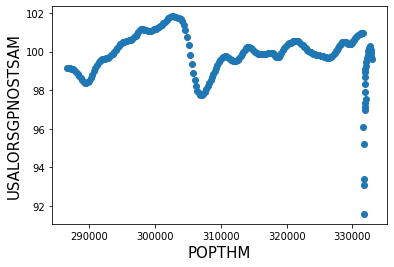

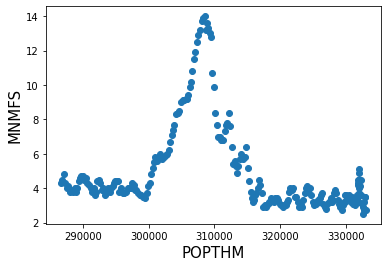

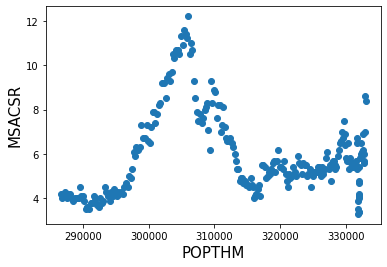

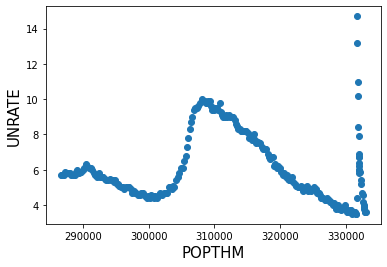

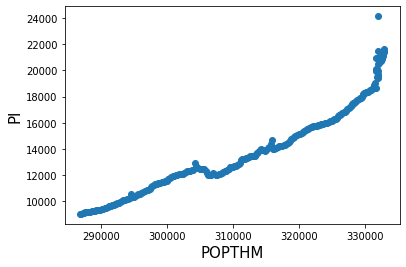

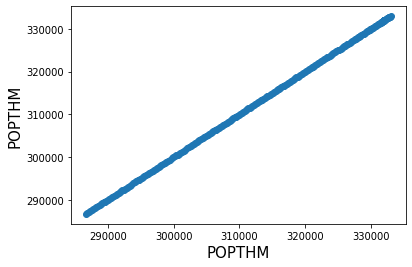

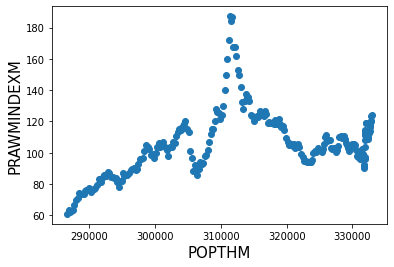

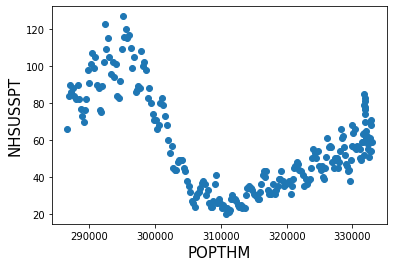

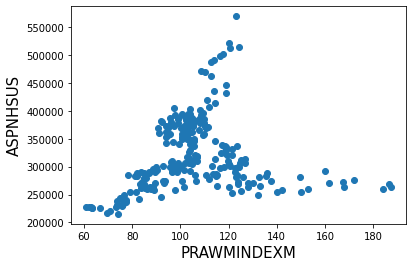

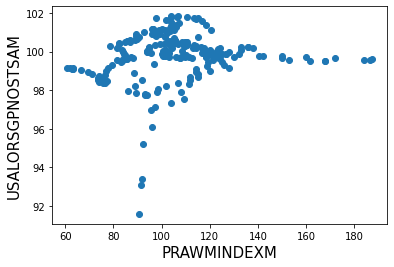

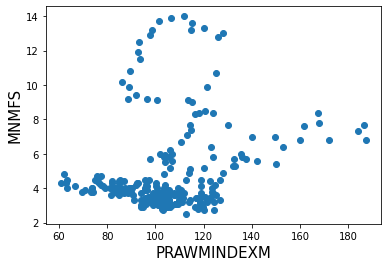

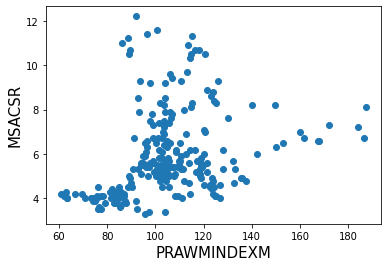

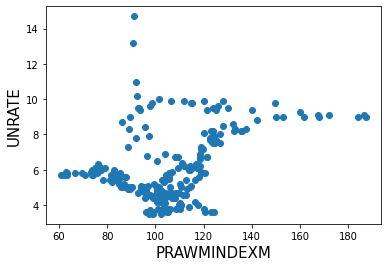

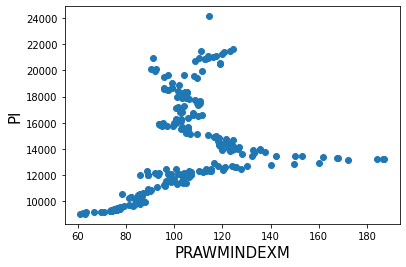

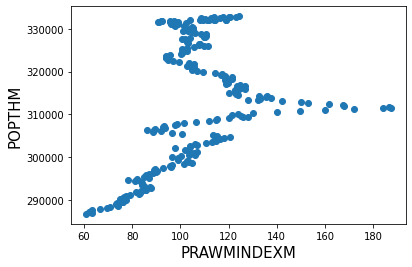

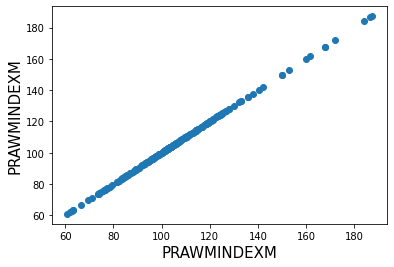

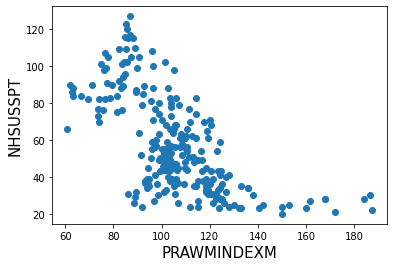

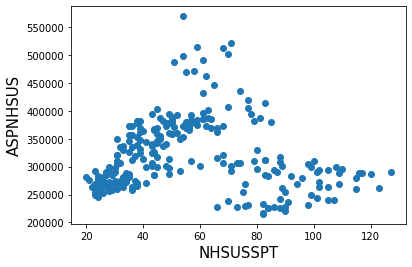

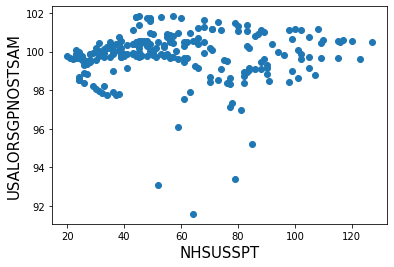

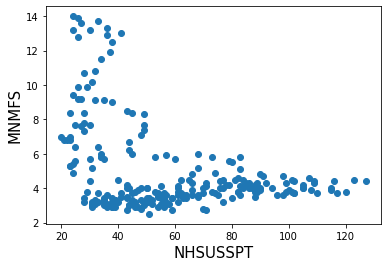

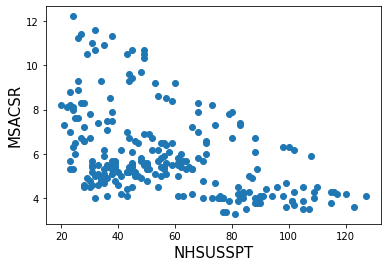

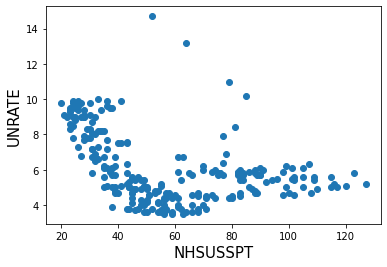

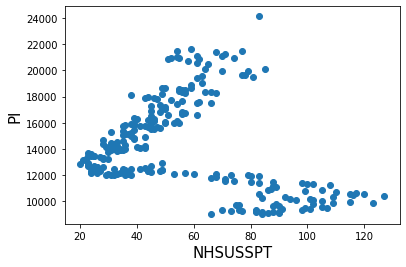

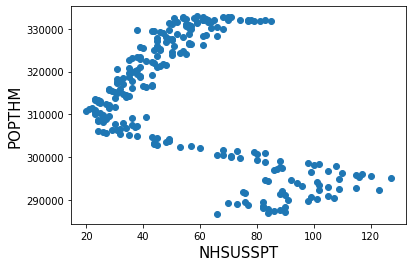

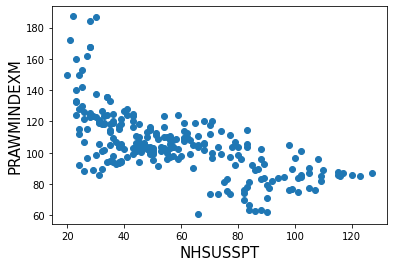

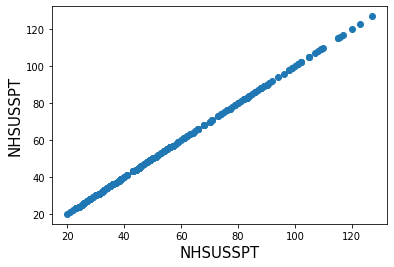

In [19]:
for i in range (0,9):
  for j in range(0,9):
    plt.scatter(df[list[i]], df[list[j]]),
    plt.tick_params(axis='both', which = 'major', labelsize = 10)
    plt.xlabel(list[i],fontsize = 15)
    plt.ylabel(list[j],fontsize = 15)
    plt.show()

In [20]:
df = df.drop("DATE", axis = 1)

In [21]:
X=df[['ASPNHSUS', 'USALORSGPNOSTSAM', 'MNMFS', 'MSACSR', 'UNRATE', 'PI', 'POPTHM', 'PRAWMINDEXM', 'NHSUSSPT']]
y=df['CSUSHPISA']

In [22]:
#data spliting Training and Testing¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Linear Regression Model

Assumptions:

1)Linearity:Linear regression needs the relationship between the independent and dependent variables to be linear.

From above Bivariate Analysis we can observe that the trend is non linear so we need to normalise the data

In [23]:
##Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-1.48506651 -0.51829885 -0.24773676 ... -1.83238141 -2.14609748
   0.3477946 ]
 [-1.4912947  -0.52106311 -0.16957127 ... -1.81867488 -2.03678954
   1.04975074]
 [-1.48195242 -0.52576687 -0.05232302 ... -1.80496834 -2.08571795
   1.28373612]
 ...
 [ 2.95095911  0.08289472 -0.56039874 ...  1.38956305  0.71482988
   0.42578972]
 [ 3.84626087 -0.04305485 -0.56039874 ...  1.39312954  0.83962375
  -0.12017616]
 [ 2.98521413 -0.16605735 -0.87306071 ...  1.39767508  0.89111751
   0.07481165]]


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [25]:
linreg=model.fit(X_train, y_train)
linreg

LinearRegression()

In [26]:
print(linreg.coef_)


[ 3.84067019e-04  6.97826592e-01  2.66629665e-01  4.22521686e+00
  3.83359566e-01  7.47776762e-03 -9.96402398e-04  6.81205898e-02
  4.63983703e-01]


In [27]:
print(linreg.intercept_)

123.94449873394883


In [28]:
# fitting the training data
linreg.fit(X_train,y_train)
y_prediction =  linreg.predict(X_test)

In [29]:
y_prediction

array([148.28749594, 272.85625529, 175.17022924, 182.58394114,
       191.08011217, 201.95809196, 151.36289559, 155.30895388,
       148.75485407, 183.28476201, 202.54604929, 146.1932769 ,
       148.06392692, 251.33223324, 204.6062295 , 183.79492748,
       199.74082076, 183.40039026, 174.15724832, 141.66178266,
       145.60248096, 169.04450865, 184.10887842, 197.86927959,
       138.21434863, 189.11279742, 141.42545789, 119.65073135,
       217.86111759, 146.48300258, 168.95728387, 140.19504901,
       125.9428044 , 139.98296635, 122.88432351, 166.05014989,
       172.04178507, 166.77043233, 215.38542886, 183.27678847,
       183.21213945, 260.91357637, 204.27696943, 193.01606952,
       165.78787854, 162.74276815, 145.00523207, 139.76375314,
       145.23608443])

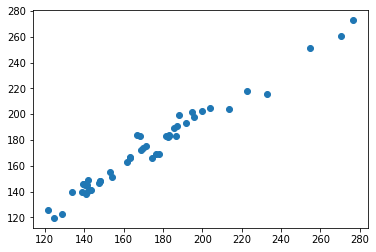

In [30]:
plt.scatter(y_test,y_prediction)

From above model it is clear that model fitted well

In [31]:
##Predefining the function for evaluating the model performance
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [32]:
regression_results(y_test,y_prediction)

explained_variance:  0.9696
r2:  0.9693
MAE:  4.6202
MSE:  37.8066
RMSE:  6.1487


##2) Homoscedasticity: Mean of residual is zero

In [33]:
y_train_pred = linreg.predict(X_train)
residuals = y_train-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.030682281099203e-14


The value of Mean of residual is very close to zero. It is mean that residuals are approximately
equal for all predicted values.

## Test Statistics for Homoscedasticity:

In [34]:
#Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances

from scipy.stats import bartlett
test = bartlett( y_train,residuals)
print(test)

BartlettResult(statistic=418.83969275485913, pvalue=4.365175217936669e-93)


In [35]:
residuals 

15     -2.356630
158    -7.327731
7      -2.229699
159    -3.855736
207    -5.514525
         ...    
67      1.694227
192     0.062757
117     5.193149
47     19.591605
172    -0.838373
Name: CSUSHPISA, Length: 196, dtype: float64

In [36]:
y_train_pred

array([133.24063047, 177.13973057, 126.06069926, 174.16773639,
       213.45552466, 161.25357378, 173.26984279, 147.58188446,
       144.17947781, 151.73330998, 160.36243744, 152.57707591,
       173.25768271, 149.05726349, 294.14408964, 144.24039301,
       213.74623467, 262.87045396, 210.93171813, 220.82869098,
       139.66497856, 182.67690636, 183.99162362, 183.17932775,
       127.22529482, 143.32196033, 182.24349611, 126.55295716,
       177.95920327, 179.12929797, 157.40266925, 201.33096532,
       183.04560976, 208.12745556, 170.87348168, 128.97884284,
       128.28750395, 140.51803509, 142.30436538, 156.15127399,
       218.79711893, 175.00479257, 170.43339201, 196.68348622,
       133.08273381, 139.51114857, 204.92346802, 142.65534921,
       180.65505417, 202.94681701, 168.34095516, 183.5914821 ,
       142.6091873 , 179.92053717, 219.29396665, 149.13872348,
       120.32783398, 160.91851842, 224.69206385, 163.96245012,
       166.0546612 , 133.94880614, 155.81157503, 180.95

H0: The error terms are homoscedastic H1: The error terms are not homoscedastic Since p<0.05 (5% level of significance), it means that Null Hypothesis (HO) rejected, that's not good for a regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


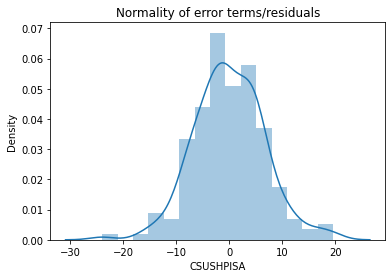

In [37]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

## 4) No Autocorrelation

The data does not follow autocorrelation means that the current value is depend on previous value.

In [38]:
residuals

15     -2.356630
158    -7.327731
7      -2.229699
159    -3.855736
207    -5.514525
         ...    
67      1.694227
192     0.062757
117     5.193149
47     19.591605
172    -0.838373
Name: CSUSHPISA, Length: 196, dtype: float64

In [39]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson

In [40]:
y

0      117.143
1      117.844
2      118.687
3      119.611
4      120.724
        ...   
240    284.767
241    290.371
242    296.496
243    301.704
244    304.831
Name: CSUSHPISA, Length: 245, dtype: float64

In [41]:
# apply durbin watson statistic on the ols residual
durbin_watson(residuals)

1.8258318376915854

In [42]:
import statsmodels.tsa.api as smt

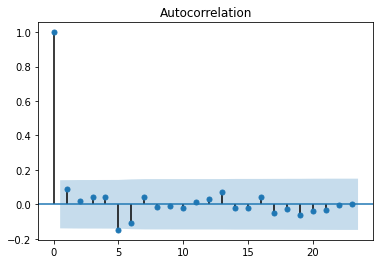

In [43]:
acf=smt.graphics.plot_acf(residuals,alpha=0.05)
acf.show()

we can see that Durbin-Watson statistics is 1.82. Hence, there is no autocorrelation to the linear model at 5% level of significance. In durbint watson test statstics lies between 1 to 2.5 menas that there is no autocorrelation.

## 5) No perfect multicollinearity

Multicollinearity occurs when independent variables are highly correlated to each other. If high multicollinearity in the data by reduce the several dimension reduction methods like PCA,LDA and Backward and forward feature ellimination

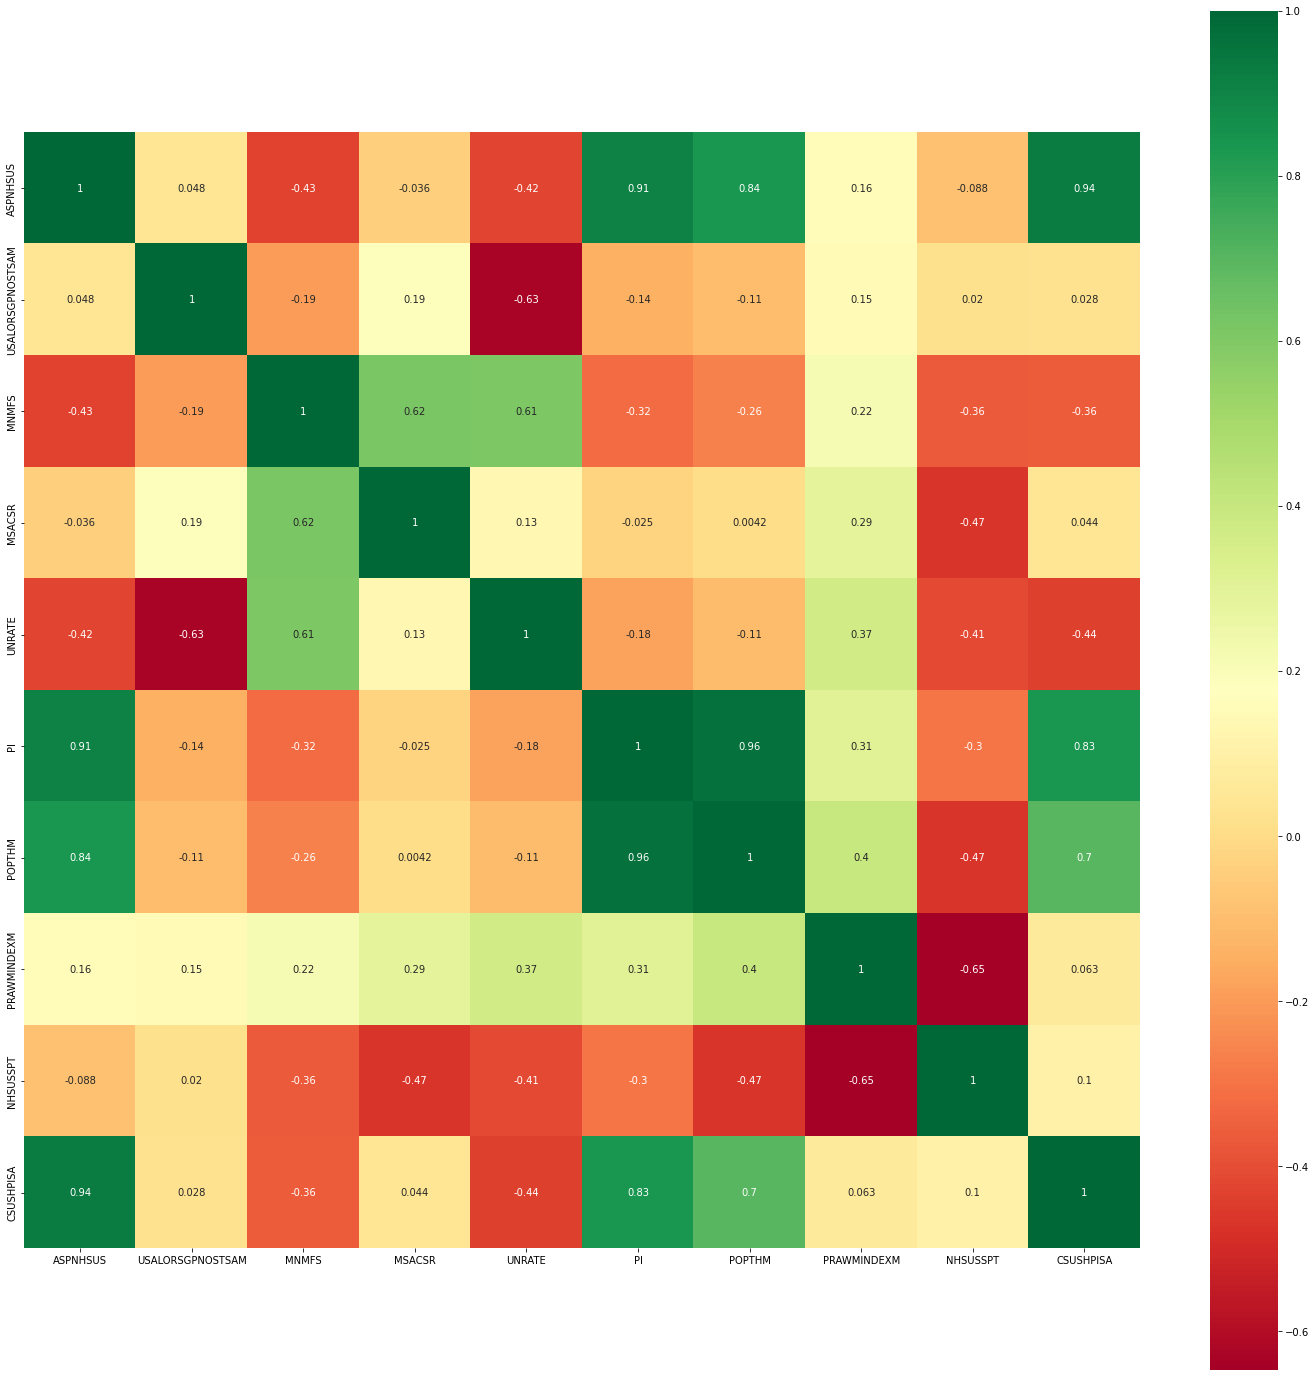

In [44]:
# seaborn has very simple solution for heatmap
plt.figure(figsize=(25,25))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

##Correlation Matrix

In [45]:
df.corr()

,ASPNHSUS,USALORSGPNOSTSAM,MNMFS,MSACSR,UNRATE,PI,POPTHM,PRAWMINDEXM,NHSUSSPT,CSUSHPISA
ASPNHSUS,1.000000,0.048005,-0.431348,-0.036091,-0.422520,0.907860,0.836574,0.156677,-0.087824,0.935067
USALORSGPNOSTSAM,0.048005,1.000000,-0.190063,0.185297,-0.630326,-0.139718,-0.105734,0.147391,0.020038,0.028393
MNMFS,-0.431348,-0.190063,1.000000,0.617213,0.612143,-0.323257,-0.263315,0.218925,-0.363837,-0.363536
MSACSR,-0.036091,0.185297,0.617213,1.000000,0.132491,-0.024612,0.004198,0.291759,-0.470378,0.044476
UNRATE,-0.422520,-0.630326,0.612143,0.132491,1.000000,-0.179419,-0.110627,0.365492,-0.414962,-0.438921
PI,0.907860,-0.139718,-0.323257,-0.024612,-0.179419,1.000000,0.962492,0.305473,-0.298545,0.834900
POPTHM,0.836574,-0.105734,-0.263315,0.004198,-0.110627,0.962492,1.000000,0.398937,-0.468629,0.702371
PRAWMINDEXM,0.156677,0.147391,0.218925,0.291759,0.365492,0.305473,0.398937,1.000000,-0.646658,0.063355
NHSUSSPT,-0.087824,0.020038,-0.363837,-0.470378,-0.414962,-0.298545,-0.468629,-0.646658,1.000000,0.100566
CSUSHPISA,0.935067,0.028393,-0.363536,0.044476,-0.438921,0.834900,0.702371,0.063355,0.100566,1.000000


We can see that high multicollinearity in the above. Independent variables are highly correlated to each other.

## Principal Component Analysis (PCA)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pc=PCA(n_components=3)

In [48]:
pc.fit(X)

PCA(n_components=3)

In [49]:
x_pca=pc.transform(X)

In [50]:
X.shape

(245, 9)

In [51]:
x_pca.shape

(245, 3)

In [52]:
x_pca

array([[-2.93580401e+00, -1.64250586e+00,  7.44070330e-01],
       [-3.05137040e+00, -1.94074642e+00,  8.56536986e-01],
       [-3.11903242e+00, -1.99938063e+00,  8.69189966e-01],
       [-3.03257634e+00, -1.90841789e+00,  8.65246622e-01],
       [-3.00157327e+00, -2.06563790e+00,  9.51180099e-01],
       [-2.95215788e+00, -1.85780638e+00,  8.93001148e-01],
       [-2.93446719e+00, -1.79386505e+00,  9.13812619e-01],
       [-2.93718051e+00, -1.95262743e+00,  1.02350895e+00],
       [-2.87806984e+00, -1.75365267e+00,  1.05259334e+00],
       [-2.72790127e+00, -1.61899669e+00,  1.07525482e+00],
       [-2.72387721e+00, -1.51522001e+00,  1.16714872e+00],
       [-2.63138449e+00, -1.39553354e+00,  1.21507733e+00],
       [-2.73112013e+00, -1.42844146e+00,  1.20319924e+00],
       [-2.76929408e+00, -1.37512925e+00,  1.13297586e+00],
       [-2.89455576e+00, -1.74709691e+00,  1.28454416e+00],
       [-2.77597763e+00, -1.57886343e+00,  1.21413601e+00],
       [-2.78578462e+00, -1.89438927e+00

Text(0, 0.5, 'Second Principal Componet')

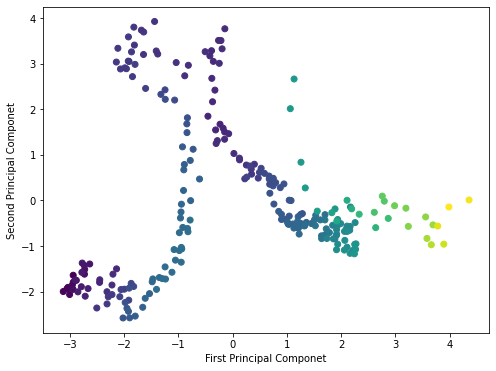

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df["CSUSHPISA"])
plt.xlabel("First Principal Componet")
plt.ylabel("Second Principal Componet")

In [54]:
#data spliting Training and Testing¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 0)

## Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [56]:
linreg=model.fit(X_train, y_train)
linreg

LinearRegression()

In [57]:
# fitting the training data
linreg.fit(X_train,y_train)
y_prediction =  linreg.predict(X_test)

In [58]:
regression_results(y_test,y_prediction)

explained_variance:  0.6916
r2:  0.6844
MAE:  18.1323
MSE:  388.8603
RMSE:  19.7195


## Random Forest Regression Model

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [60]:
regression_results(y_test,rf_pred)

explained_variance:  0.9876
r2:  0.9875
MAE:  2.6735
MSE:  15.3543
RMSE:  3.9185


Decision Tree Regression Model

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
Dtree = DecisionTreeRegressor()
Dtree.fit(X_train,y_train)
Dtree_pred = Dtree.predict(X_test)

In [62]:
regression_results(y_test, Dtree_pred)

explained_variance:  0.9265
r2:  0.9223
MAE:  4.4505
MSE:  95.7773
RMSE:  9.7866


In [63]:
#Result of each model
Linear_reg=0.6844
RF_reg = 0.9847
DT_reg =0.9349

In [64]:
Accuracy = pd.DataFrame({'Models': ['Linear_reg','RF_reg','DT_reg'],
                            'Accuracy Score':[Linear_reg,RF_reg,DT_reg]}).reset_index(drop = True)
Accuracy

,Models,Accuracy Score
0,Linear_reg,0.6844
1,RF_reg,0.9847
2,DT_reg,0.9349


## Predicting the Test set results

In [65]:
prediction = rf.predict(X_test)
regression_results(y_test,prediction)

explained_variance:  0.9876
r2:  0.9875
MAE:  2.6735
MSE:  15.3543
RMSE:  3.9185
